# Expedia Data Exploration & Visualization

## Business Understanding
Expedia has provided logs of customer behavior captured during their online search sessions. The purpose of this data is to take customer behavior and use it to predict which hotel clusters the customers are likely to book. Hotel clusters are based on Expedia's algorithm which groups hotels based on price, customer ratings, and location. A hotel cluster example might be hotels located in downtown Dallas in the $250-300 per night price range with an average rating between 3-4 stars (out of 5). However since the data is from Kaggle all the clusters are masked by an id.  We are unable to see the star raitng or specific location of each hotel cluser.  Expedia has provided a training data set which is a random sample of customer behavior and hotel cluster bookings from 2013-2014. The objective is to use data mining techniques to develop a predictive algorithm based on these data and then apply it to a test data set consisting of randomly sampled customer behavior from 2015. Since this is part of a Kaggle competition, only Expedia knows the true outcome of how 2015 customers booked by hotel cluster. The success of the predictive algorithm will be based on the rate of accurate categorization of 2015 Expedia customers into the appropriate hotel cluster. A successful submission will include 5 hotel cluster recommendations for each line item of the test data set. Scoring is based on whether the correct cluster is presented in the 5 clusters as well as where it is ranked in the 5 recommendation. The test data set has two less variables than the training data set which include is booked since all the test data is actaul bookings and the hotel cluster chosen.  

Based on some of the comments within the Kaggle site many people are only predicting abotu 25 percent of the hotel clusters.  With the anonymous hotel clusters this will be a difficult analysis.  

## Data Understanding

### Data Import and description:
Here's a basic rundown of the size of the data we'll be working with:

train_df.shape
(37,670,293, 24)

test_df.shape
(2,528,243, 22)

The training data set is huge at 4 GB and over 37 million rows. The test data set is 2.5 million rows and contains only bookings. We know out of the gate that we want to focus on the bookings in the training set to match the test set and to reduce the size of the data. There are also 100 hotel clusters that will be our classification targets but will be difficult to visualize in the preprocessing steps so only the top 5 booking clusters will be analyzed in lab 1. We will demonstrate how we arrive at the reduced data in the following coding steps.

The default data types and attribute descriptions as provided by Expedia are in the following table:

In [1]:
#Import required packages
import pandas as pd
import numpy as np
from datetime import date, datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read in attribute descriptions provided on the Kaggle competition data page.
expedia_data_df = pd.read_csv('data/Expedia_Data.csv')

pd.set_option('max_colwidth', 800)
expedia_data_df

,Column name,Data type,Description
0,date_time,datetime64[ns],Timestamp
1,site_name,int64,"ID of the Expedia point of sale (i.e. Expedia.com,�Expedia.co.uk,�Expedia.co.jp, ...)"
2,posa_continent,int64,ID of continent associated with site_name
3,user_location_country,int64,The ID of the country the customer is located
4,user_location_region,int64,The ID of the region the customer is located
5,user_location_city,int64,The ID of the city the customer is located
6,orig_destination_distance,float64,Physical distance between a hotel and a customer at the time of search.�A null means the distance could not be calculated
7,user_id,int64,ID of user
8,is_mobile,int64,"1 when a user connected from a mobile device, 0 otherwise"
9,is_package,int64,"1 if the click/booking was generated as a part of a package (i.e. combined with a flight), 0 otherwise"


### Describe the expedia data
We can begin to group some of the variables together based off of which items are connected.  Site name will be highly correlated with posa continent and user location country.  The site name for expedia includes expedia.com, expedia.co.uk, and expedia.co.jp however these are masked as ids again thanks to Kaggle. But we since we know a ceratain id pertain to a certian countries then the user location country should really match up fairly uniquely to certain site names (ids). There will be anomilies in which testing is done in other countries or someone is tricking the computer to use the UK site in the US but the majority should fall with in one. 

Other variables that are highly correlated are the items that all contain the hotel and search destinaiton in front of it.  These items are all describing the hotel cluster even if they are just ids.  Hopefull we can pull patterns from these items.  

Hotel continent and user continent might allow us to figure out which they are rather than just using the ID.  There are 7 continents however only 6 have poputlations on them.  Posa continent only has 5 so it means that expedia might not have be available in the 6th contient.  However there are 6 continents within the hotel continent variable so it means people are still able to book hotels in that continent even though the expidia site might not be available there. We can also begin to use this methodology to understand the countries too.  

We might simple do a count by posa continent to figure out how many searches come from each.  By connecting this data with actual populations of the contintents we should be able to match up the corresponding population to the continent.  We can also do this to pick out the most populated countries.  The customers in the United states might act very differently than those in Japan.  

Other correlated variable might be the room count an the actual number of guests.  Especially when the guests number is over 2.  If there are childeren then the hotels chosen might differ from customers who are only two adults.  We do not know what each cluster is but there might be some that are very family friendly.  So customers who have searches that include kids may only pick certain clusters.  

Finally some other variables that might be benficial is the user id.  If a person has an account with expedia and uses expidia to book all their hotels they may have the same user id.  This user may only book a certain level of hotels to if we see a user ID repeated it may be much easier to figure out what that customer will pick each time.  Though this is probably only a really small subset it still will allow us to better predict the hotel cluster.  

### Verify Data Quality:

In [2]:
# Read in the full data set once. Setting the data types saves memory since all the continuous variables can be 
# held with int32 with the exception of 'orig_destination_distance' which will stay a float.

train_df = pd.read_csv('/Users/Bear/Documents/notebooks/train.csv',
                    parse_dates=['date_time', 'srch_ci', 'srch_co'],
                    dtype={'site_name':np.int32, 'posa_continent':np.int32, 'user_location_country':np.int32,
                           'user_location_region':np.int32, 'user_location_city':np.int32, 'user_id':np.int32,
                           'is_mobile':bool, 'is_booking':bool, 'is_package':bool, 'channel':np.int32, 
                           'srch_adults_cnt':np.int32, 'srch_children_cnt':np.int32, 'srch_rm_cnt':np.int32,
                           'srch_destination_id':np.int32, 'srch_destination_type_id':np.object, 'cnt':np.int32,
                           'hotel_continent':np.int32, 'hotel_country':np.int32, 'hotel_market':np.int32, 
                           'hotel_cluster':np.int32})

In [3]:
# srch_ci and srch_co didn't convert to datetime
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37670293 entries, 0 to 37670292
Data columns (total 24 columns):
date_time                    datetime64[ns]
site_name                    int32
posa_continent               int32
user_location_country        int32
user_location_region         int32
user_location_city           int32
orig_destination_distance    float64
user_id                      int32
is_mobile                    bool
is_package                   bool
channel                      int32
srch_ci                      object
srch_co                      object
srch_adults_cnt              int32
srch_children_cnt            int32
srch_rm_cnt                  int32
srch_destination_id          int32
srch_destination_type_id     object
is_booking                   bool
cnt                          int32
hotel_continent              int32
hotel_country                int32
hotel_market                 int32
hotel_cluster                int32
dtypes: bool(3), datetime64[ns](1)

### Sampling the data
In order for us to process the data in a timely matter we will need to take a sample of the entire set. Our first big cut will only include customers who actually booked.  

In [4]:
#Exclude all clicks to retain only bookings since the test dataset only contains bookings.
train_booked_df = train_df[train_df['is_booking'] != False]

In [5]:
# Export to CSV file:
train_booked_df.to_csv('train_booked.csv')

In [7]:
# From this point it's more efficient to reference the reduced data set.
train_booked_df = pd.read_csv('/Users/Bear/Documents/notebooks/train_booked.csv', parse_dates=['date_time', 'srch_ci', 'srch_co'])
train_booked_df.drop(['Unnamed: 0'], axis=1, inplace=True)

# adding a variable
Checkin (srch_ci) and checkout (srch_co) don't necessarily mean alot to us in a vacuum, but calculating checkin relative to date of search yields the user's booking window, and checkout relative to checkin yields length of stay. We expect these continuous variables could potentially lend explanatory power to this analysis. We also want to analyze weeks as a potential indicator of seasonality. We will be adding three varibles based on the check in, check out, and search dates.  

### Booking window 
- will be calculated by subtracting the the the search date from the check in date.  We will be able to see how far in advance to guest book the hotel.  Do certian clusters match up with certain booking windows.  Since the clusters are based on the price there is a chance that the price might be lower the further out they book the hotel which may point us to certain clusters.  

### Length of stay 
- will be calculated by subtracting the check in date from the check out date.  We will be able to see how long the actual trip is.  We might be able to see if the hotel stay is for business or play.  Customers who only go for one night may choose a very different cluster than those who book for an entire week.

### Ci week
- will use the week function in order for use to see which week in the year the trip was booked.  We can see if there is a seasonality to when customers book certain trips.  We can start to deduce if it a summer trip with the family or a romanic getaway for just a couple.  By beginning to predict these items about the customer we will begin to see patterns that might also predict which hotel cluster they choose.  

### Search week 
- Will also used the week function but this time on the search date.  This variable will also give us additional hints on to when customers search for hotels.  



In [8]:
# there are 2 datetime fields that didn't convert using parse_dates
ci_ord    = pd.to_datetime(train_booked_df.loc[:,'srch_ci'], format='%Y-%m-%d').apply(lambda x: x.toordinal() if x == x else np.nan)
co_ord    = pd.to_datetime(train_booked_df.loc[:,'srch_co'], format='%Y-%m-%d').apply(lambda x: x.toordinal() if x == x else np.nan)
srch_ord  = train_booked_df.loc[:,'date_time'].apply(lambda x: x.toordinal() if x == x else np.nan)

# Length of stay and booking window are hopefully variables that could lend predictive value.
train_booked_df['length_of_stay'] = abs(co_ord - ci_ord)
train_booked_df['booking_window'] = abs(ci_ord - srch_ord)

# Week provides a level of granularity that might pick up seasonal and holiday pattern specific to each continent and country of origin
train_booked_df['ci_week']   = pd.to_datetime(train_booked_df.loc[:,'srch_ci'], format='%Y-%m-%d').apply(lambda x: x.week if x == x else np.nan)
train_booked_df['srch_week']   = train_booked_df['date_time'].apply(lambda x: x.week if x == x else np.nan)

train_booked_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000693 entries, 0 to 3000692
Data columns (total 28 columns):
date_time                    datetime64[ns]
site_name                    int64
posa_continent               int64
user_location_country        int64
user_location_region         int64
user_location_city           int64
orig_destination_distance    float64
user_id                      int64
is_mobile                    bool
is_package                   bool
channel                      int64
srch_ci                      datetime64[ns]
srch_co                      datetime64[ns]
srch_adults_cnt              int64
srch_children_cnt            int64
srch_rm_cnt                  int64
srch_destination_id          int64
srch_destination_type_id     int64
is_booking                   bool
cnt                          int64
hotel_continent              int64
hotel_country                int64
hotel_market                 int64
hotel_cluster                int64
length_of_stay       

### grouping the variables

By grouping the variables into continuous, boolean, ordianl, and categoriacal features we can see which variables will be easier to visualize.  

In [9]:
#Changing our data types saves roughly 150 MB in memory.

# let's start by first changing the numeric values to be int32 (orig_destination_distance stays float64)
continuous_features = ['srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt', 'cnt', 'length_of_stay', 
                      'booking_window']

# ints that store [0,1] switched to booleans
boolean_features = ['is_mobile', 'is_package', 'is_booking']

# and the ordinnal values to be integers
ordinal_features = ['ci_week', 'srch_week']

# categorical variables stored as objects
categ_features = ['site_name','posa_continent','user_location_country', 'user_location_region',
                 'user_location_city', 'user_id', 'channel', 'srch_destination_id', 'srch_destination_type_id',
                 'hotel_continent', 'hotel_country', 'hotel_market', 'hotel_cluster'];

# use the "astype" function to change the variable type
train_booked_df[continuous_features] = train_booked_df[continuous_features].astype(np.int32)
train_booked_df[boolean_features] = train_booked_df[boolean_features].astype(np.bool)
train_booked_df[ordinal_features] = train_booked_df[ordinal_features].astype(np.int32)
train_booked_df[categ_features] = train_booked_df[categ_features].astype(np.object)

# Clean up the date variables that we no longer need since we've converted to more normalized continuous or ordinals.
#train_booked_df.drop(['date_time', 'srch_ci', 'srch_co'], axis=1, inplace=True)

train_booked_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000693 entries, 0 to 3000692
Data columns (total 28 columns):
date_time                    datetime64[ns]
site_name                    object
posa_continent               object
user_location_country        object
user_location_region         object
user_location_city           object
orig_destination_distance    float64
user_id                      object
is_mobile                    bool
is_package                   bool
channel                      object
srch_ci                      datetime64[ns]
srch_co                      datetime64[ns]
srch_adults_cnt              int32
srch_children_cnt            int32
srch_rm_cnt                  int32
srch_destination_id          object
srch_destination_type_id     object
is_booking                   bool
cnt                          int32
hotel_continent              object
hotel_country                object
hotel_market                 object
hotel_cluster                object
length_o

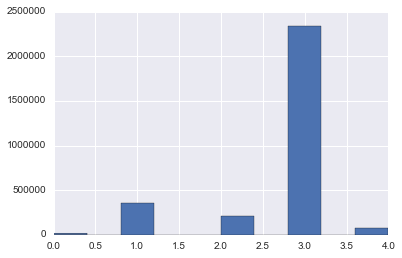

In [10]:
import pylab as P
### looking at ways to group the orig_destination_distance
##bins=20, range=(0,26), alpha = .5
train_booked_df['posa_continent'].dropna().hist()
P.show()

There are 6 continents that a customer can book in but only 5 in which they search in.  So there is a contitnent that does not have the expedia site.  Based on the examples given in the site name we know that expedia does exist in North America, Europe and ASIA.  Since expedia origianted in the US it is very easy to have move to Australia since it is also an english speaking continent.  South america is so close to north america so it is highly likely that the expedia site aslo exists with in south america.  This only leaves Africa and Antarica as locations that people do not book from however they can find a hotel in africa on expedia.  

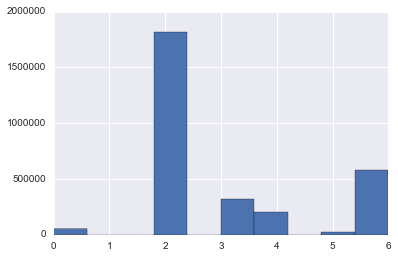

In [11]:
train_booked_df['hotel_continent'].dropna().hist()
P.show()

There are too many countries to really visualize this welll but we can take away that since expedia started int he US the country with the most searches is probably the US.  

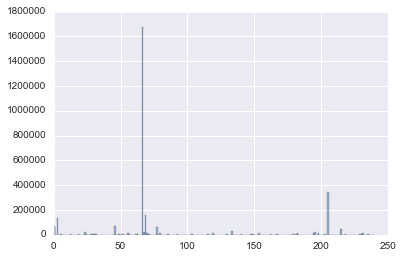

In [13]:
train_booked_df['user_location_country'].dropna().hist(bins=200, alpha = .5)
P.show()


it appears that only 1/8 of the bookings happen on a mobile device.  We can also predict that the people who are booking on a mobile device are a younger generation that are more tech savvy.  When doing analysis on the full data set being able to break the customers into categories will help us in our ending prediction.  

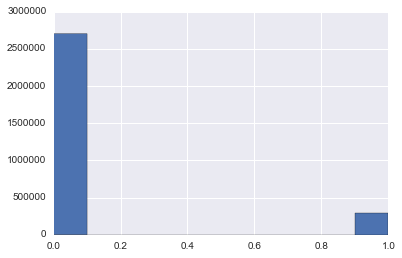

In [14]:
train_booked_df['is_mobile'].dropna().hist()
P.show()

only 1/6 choose a package while the others only use expedia for the hotel.  People who book packages may be those looking for a deal or those who don't travel much.  Again these items allow us to create buckets of what the customer might fit into. 

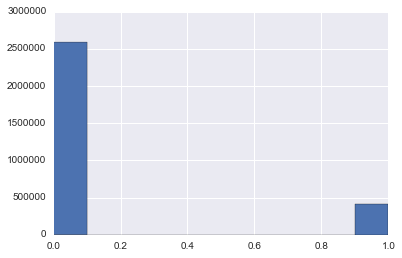

In [15]:
train_booked_df['is_package'].dropna().hist()
P.show()

In [16]:
# Null values contained in this variable
train_booked_df['orig_destination_distance'].count
pd.isnull(train_booked_df['orig_destination_distance'])

0          False
1           True
2           True
3           True
4          False
5          False
6          False
7          False
8          False
9           True
10          True
11          True
12          True
13          True
14          True
15          True
16          True
17         False
18         False
19         False
20         False
21          True
22         False
23          True
24          True
25          True
26          True
27          True
28          True
29          True
           ...  
3000663    False
3000664    False
3000665    False
3000666    False
3000667     True
3000668    False
3000669     True
3000670     True
3000671     True
3000672     True
3000673     True
3000674     True
3000675    False
3000676     True
3000677     True
3000678    False
3000679     True
3000680     True
3000681    False
3000682     True
3000683     True
3000684     True
3000685     True
3000686    False
3000687    False
3000688    False
3000689    False
3000690    Fal

We can see that there are missing values in the orig_destination_distance attribute. We can potentially impute orig_destination_distance by using means based on a combination of user continent and hotel continent/country. Let's look at groupings based on these attributes:

In [17]:
train_booked_df.groupby(['posa_continent','hotel_continent','hotel_country'])['orig_destination_distance'].agg(['mean','median'])


mean       median
posa_continent hotel_continent hotel_country                           
0              0               34              7532.852115   7474.78370
                               63              7936.185861   8307.19950
                               87              6166.110100   6166.11010
                               140             6795.626617   6776.66210
               2               50              2970.473244   2097.30480
                               198             3467.259915   2497.61140
               3               0               7104.608097   6821.32340
                               1               7875.885700   7875.88570
                               3               9955.059720   9998.97480
                               5               9962.857252   9916.42990
                               38              8994.433000   8994.43300
                               48              7712.651499   7606.26630
                               82             11381.844250  11363.81380
                               89              9827.973433  10429.18290
                               92                      NaN          NaN
                               99             10116.954861  10956.96090
                               104             9073.538553   9127.44470
                               106             9569.125753  11347.97320
                               112                     NaN          NaN
                               115             7376.855200   7381.46610
                               126             9791.849314  11353.08650
                               130                     NaN          NaN
                               141             9964.977375  10402.89270
                               151             9729.376975   9925.90390
                               152             8564.573975   8383.40565
                               162            10368.875971  10485.20050
                               168             9005.447116   9944.23900
                               171            10700.756770  11023.19120
                               182             9874.177081   9912.15595
               4               8                614.018435    320.00930
...                                                    ...          ...
4              6               68              9864.439400  10292.71880
                               69              8698.680825   8614.53100
                               70             10197.983026  10515.27190
                               71              9538.618967   9832.33055
                               72              9835.185931  10011.08180
                               74             10772.916150  10772.91615
                               75              8929.629650   8929.62965
                               77             10367.942287  10677.96130
                               78             10710.798400  10710.79840
                               79              9140.402497   9452.36390
                               83                      NaN          NaN
                               105             9433.190056  10023.16390
                               107             9481.092747   9886.69850
                               111             9415.631586   9749.68490
                               127             8786.201156   8940.43280
                               135             9688.119142  10335.92260
                               138                     NaN          NaN
                               144             9108.714226  10012.23525
                               159            10085.156443  10355.37820
                               166                     NaN          NaN
                               169             9486.389587   9898.46080
                               170            10688.212383  11207.21505
                               180             9270.498304   9792.45440
                      

There is variance between the mean and median for the relationship between the user's search location and the hotel which is what we'd expect given that we're dealing with location averages within whole continents. We will still try to impute distance based on these attributes since there are so many missing and would love to retain a continuous variable:

In [43]:
# Impute the median distance between a user location and destination
train_df_imputed = train_booked_df
train_df_imputed['orig_destination_distance'] = train_df_imputed.groupby(['posa_continent',
                                                                          'hotel_continent',
                                                                          'hotel_country']).transform(lambda x: x.fillna(x.mean()))
# Change back to float
train_df_imputed['orig_destination_distance'] = train_df_imputed['orig_destination_distance'].astype(np.float64)

We were able to successfully impute all missing values with this groupby strategy:

### Simple descriptive statistics:

In [79]:
# Simple descriptive statistics. (Unsure how to convert out of scientific notation)
train_df_imputed.describe()

,orig_destination_distance,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,cnt,length_of_stay,booking_window,ci_week,srch_week
count,3.000693e+06,3.000693e+06,3.000693e+06,3.000693e+06,3.000693e+06,3.000693e+06,3.000693e+06,3.000693e+06,3.000693e+06
mean,9.373060e+00,1.872313e+00,2.767444e-01,1.129579e+00,1.015258e+00,2.426127e+00,3.623854e+01,2.866210e+01,2.836140e+01
std,1.191513e+01,9.137354e-01,6.556351e-01,4.786223e-01,1.436803e-01,2.022430e+00,5.217436e+01,1.459975e+01,1.440301e+01
min,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,2.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00,1.700000e+01,1.600000e+01
50%,2.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.600000e+01,3.000000e+01,2.900000e+01
75%,1.100000e+01,2.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,4.600000e+01,4.100000e+01,4.100000e+01
max,5.300000e+01,9.000000e+00,9.000000e+00,8.000000e+00,2.100000e+01,1.290000e+02,6.450000e+02,5.300000e+01,5.200000e+01


In [112]:
train_df_imputed['orig_destination_distance'].describe()

count    3.000693e+06
mean     9.373060e+00
std      1.191513e+01
min      2.000000e+00
25%      2.000000e+00
50%      2.000000e+00
75%      1.100000e+01
max      5.300000e+01
Name: orig_destination_distance, dtype: float64

In [80]:
print(train_df_imputed['length_of_stay'].describe())

count    3.000693e+06
mean     2.426127e+00
std      2.022430e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      1.290000e+02
Name: length_of_stay, dtype: float64


In [81]:
print(train_df_imputed['booking_window'].describe())

count    3.000693e+06
mean     3.623854e+01
std      5.217436e+01
min      0.000000e+00
25%      4.000000e+00
50%      1.600000e+01
75%      4.600000e+01
max      6.450000e+02
Name: booking_window, dtype: float64


In [82]:
print train_df_imputed.shape

(3000693, 28)


### Data Visualizations:
Now that we have reduced our training set to bookings and imputed missing values, we want to see how our response variable, the hotel clusters, is distributed among the bookings.

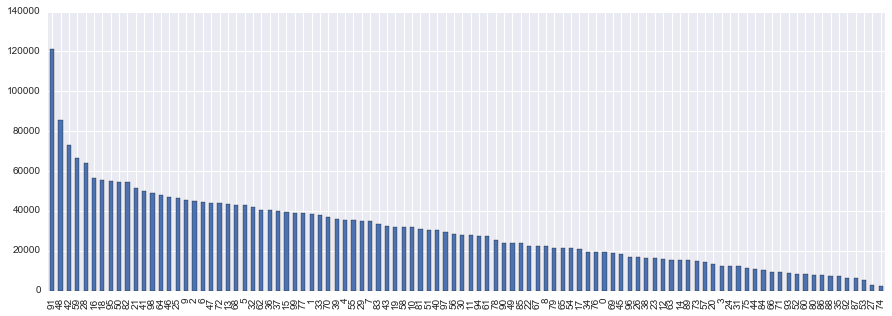

In [83]:
# Plot frequency for each hotel_clusters

train_df_imputed["hotel_cluster"].value_counts().plot(kind='bar',figsize=(15,5))

In [84]:
train_df_imputed["hotel_cluster"].value_counts().nlargest(10)

91    120972
48     85377
42     73123
59     66609
28     63978
16     56676
18     55659
95     55125
50     54409
82     54320
Name: hotel_cluster, dtype: int64

The histogram shows that clusters 91, 48, 42, 59, and 28 round out the top 5 with 91 well ahead of the pack. There is a small break in the top 5 and top 10 clusters so we will proceed with visualizations with the top 5 clusters as focal point.

In [113]:
# List holds top hotel_clusters:
top5 = [91, 48, 42, 59, 28]

# Create new dataframes containing top5 and top10 clusters.
train_top5_df = train_df_imputed[train_booked_df['hotel_cluster'].isin(top5)]

print train_top5_df.shape

(410059, 28)


In [ ]:
# Export the top5 dataframe to a CSV file in the current directory:
train_top5_df.to_csv('train_booked_top5.csv')

In [87]:
from pandas.tools.plotting import scatter_matrix
trainSub = train_top5_df[['posa_continent', 'user_location_country','user_location_region',
                            'user_location_city','orig_destination_distance','hotel_continent','hotel_country',
                           'hotel_market','hotel_cluster', 'length_of_stay', 'booking_window']]
trainSub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410059 entries, 17 to 3000692
Data columns (total 11 columns):
posa_continent               410059 non-null object
user_location_country        410059 non-null object
user_location_region         410059 non-null object
user_location_city           410059 non-null object
orig_destination_distance    410059 non-null float64
hotel_continent              410059 non-null object
hotel_country                410059 non-null object
hotel_market                 410059 non-null object
hotel_cluster                410059 non-null object
length_of_stay               410059 non-null int32
booking_window               410059 non-null int32
dtypes: float64(1), int32(2), object(8)
memory usage: 34.4+ MB


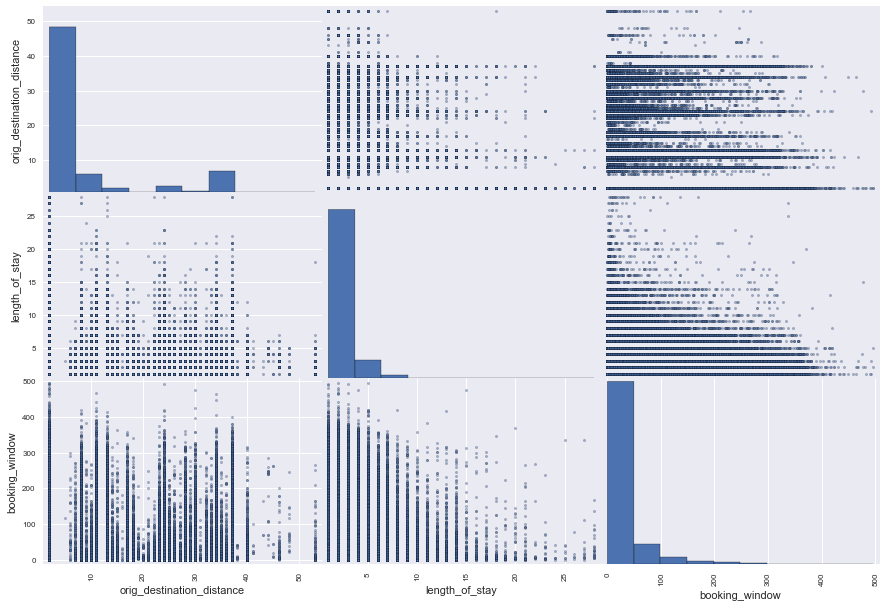

In [88]:
ax = scatter_matrix(trainSub, figsize=(15,10))

The scatter plots show no correlation between continous variables. Most of the stays are short, a few days, and booking windows are short too. Also most people travel great distances.

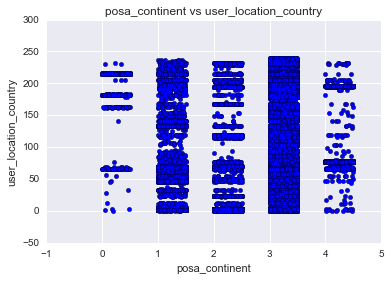

In [89]:
s1 = plt.scatter(trainSub['posa_continent'] + 0.5*np.random.random(len(trainSub.index)), 
                 trainSub['user_location_country'] + 0.5*np.random.random(len(trainSub.index)))
plt.title('posa_continent vs user_location_country')
plt.xlabel('posa_continent')
plt.ylabel('user_location_country')
plt.show()

Continent 3 dominates the booking from category as evidenced in the scatter plot above.

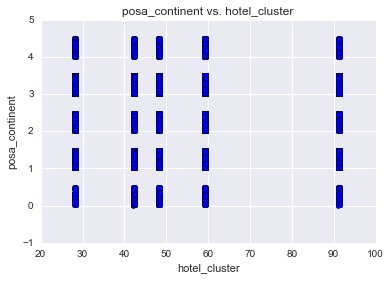

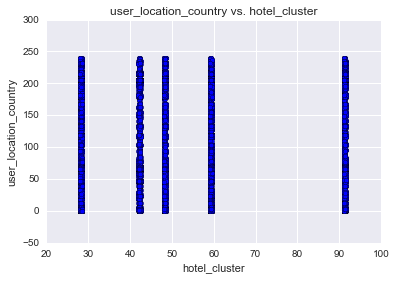

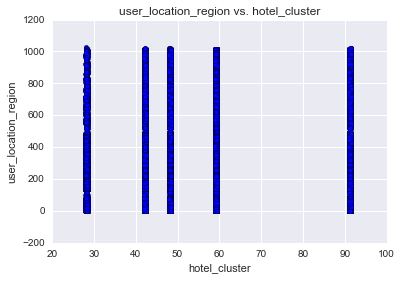

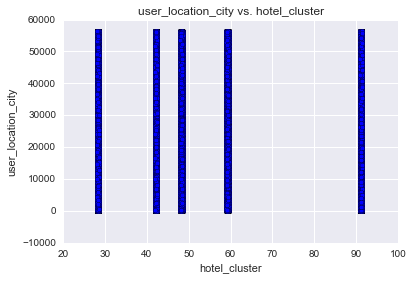

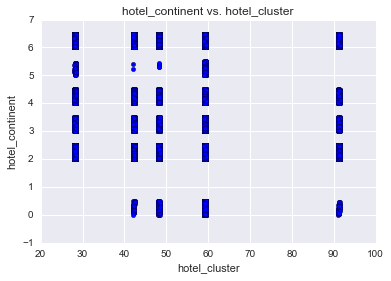

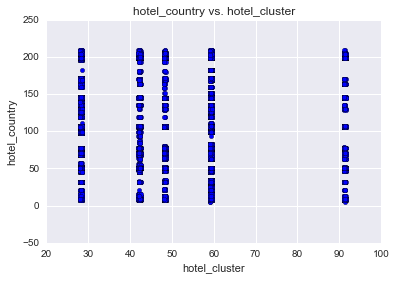

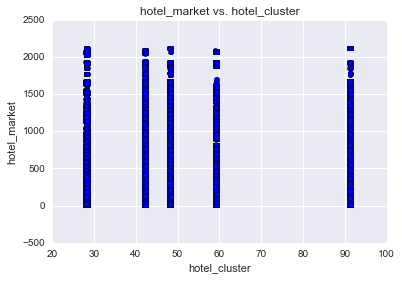

In [90]:
non_continous = ('posa_continent', 'user_location_country','user_location_region',
                'user_location_city','hotel_continent','hotel_country','hotel_market')
for lablel in non_continous:
    s2 = plt.scatter(trainSub['hotel_cluster'] + 0.5*np.random.random(len(trainSub.index)), 
                 trainSub[lablel] + 0.5*np.random.random(len(trainSub.index)))
    plt.title(lablel + ' vs. hotel_cluster')
    plt.xlabel('hotel_cluster')
    plt.ylabel(lablel)
    plt.show()

From these scatter plots each hotel_cluster exists in all markets, countries and regions. So far, we can't determine correlations between certain user locations or user destinations based on these jittered scatter plots.

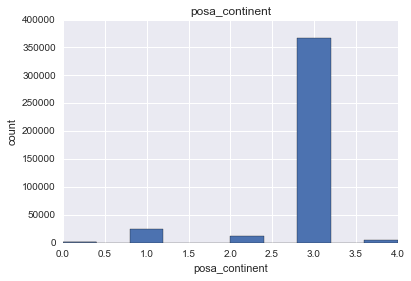

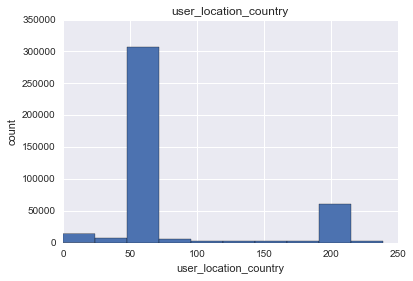

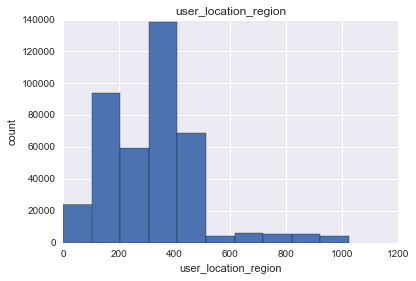

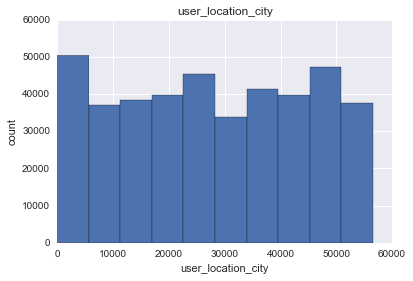

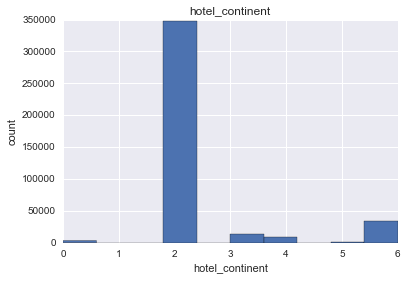

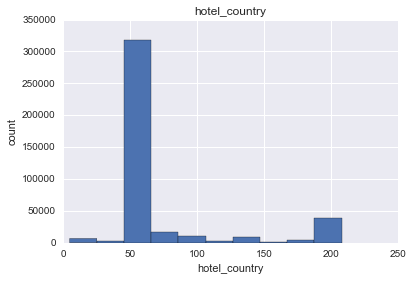

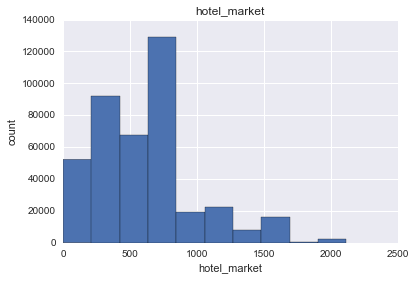

In [91]:
for label in non_continous:
    h1 = plt.hist(trainSub[label])
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel('count')
    plt.show()

At a high level we know that a primary component of the hotel cluster is the location, so this first group of histograms show us that most users are searching for hotels in continent 2. Regions and markets tell us less since they are not clearly defined by Expedia. The best way to judge customer behavior is to look at user location through continent, country and city, and user destination through hotel continent and country. Combining these variables into one plot shows clearly that nearly half the users in our sample are searching for hotels in continent 2 from continent 3:

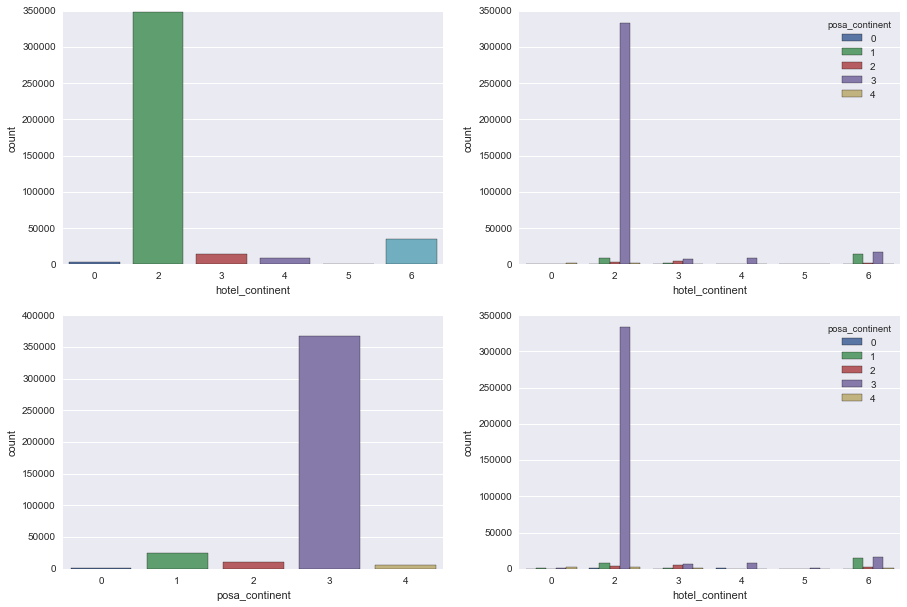

In [92]:
# preferred continent destinations and search origination:

fig, ((axis1,axis2),(axis3,axis4)) = plt.subplots(2,2,figsize=(15,10))

sns.countplot(x='hotel_continent', data=train_top5_df, ax=axis1)
sns.countplot(x='hotel_continent', hue='posa_continent', data=train_top5_df, ax=axis2)
sns.countplot(x='posa_continent', data=train_top5_df, ax=axis3)
sns.countplot(x='hotel_continent', hue='posa_continent', data=train_top5_df, ax=axis4)


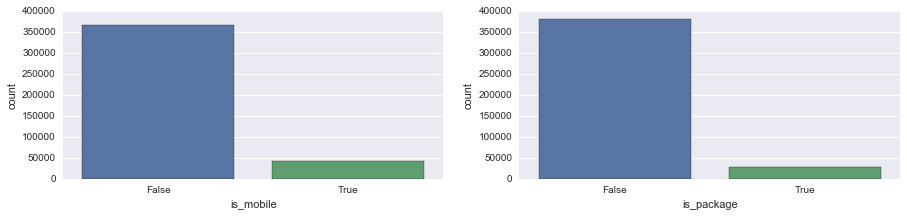

In [64]:
# Plot frequency of is_mobile & is_package

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,3))

# What's the frequency of bookings through mobile?
sns.countplot(x='is_mobile',data=train_top5_df, ax=axis1)

# What's the frequency of bookings with package?
sns.countplot(x='is_package',data=train_top5_df, ax=axis2)

Most bookings come from neither mobile nor packaged transactions, so preliminary investigation suggests these might not yield successful predictive value.

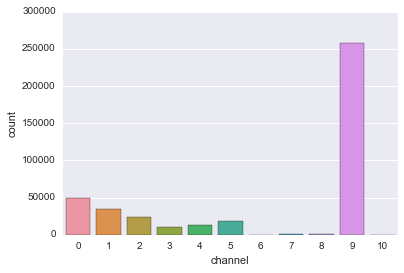

In [65]:
# Marketing channel histogram:
sns.countplot(x='channel', data=train_top5_df)

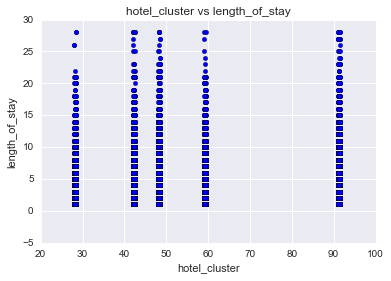

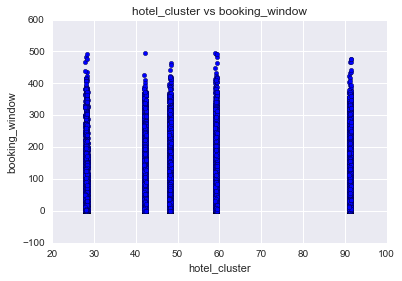

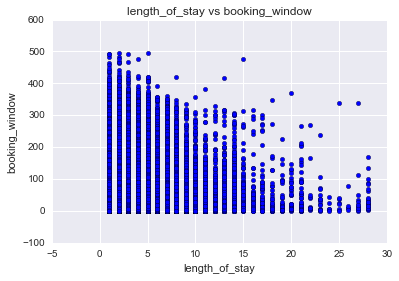

In [95]:
for label in continous:
    s2 = plt.scatter(trainSub['hotel_cluster']+0.5*np.random.random(len(trainSub.index)),
                     trainSub[label])
    plt.title('hotel_cluster vs ' + label)
    plt.xlabel('hotel_cluster')
    plt.ylabel(label)
    plt.show()
    
s3 = plt.scatter(trainSub['length_of_stay'], trainSub['booking_window'])
plt.title('length_of_stay vs booking_window')
plt.xlabel('length_of_stay')
plt.ylabel('booking_window')
plt.show()

From these scatter plots there is not one hotel_cluster that people book further ahead for or stay longer at.

In [114]:
# Adults only bookings (top 5)
trainAdult = train_top5_df[train_top5_df['srch_children_cnt']==0]

In [97]:
clusterAdult = set(trainAdult['hotel_cluster'])
print(clusterAdult)

set([48L, 91L, 42L, 59L, 28L])


In [115]:
# Children only bookings (top 5)
trainChild = train_top5_df[train_top5_df['srch_children_cnt']>0]

In [70]:
clusterChild = set(trainChild['hotel_cluster'])
print(clusterChild)

set([48L, 59L, 42L, 91L, 28L])


In [99]:
hclusterChild = trainChild.groupby(by=[trainChild['hotel_cluster']])
hclusterChildCount = hclusterChild.hotel_cluster.count()
hclusterAdult = trainAdult.groupby(by=[trainAdult['hotel_cluster']])
hclusterAdultCount = hclusterAdult.hotel_cluster.count()

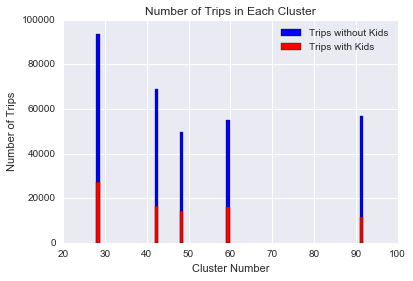

In [72]:
p1 = plt.bar(clusterAdult,hclusterAdultCount, color = 'b')
p2 = plt.bar(clusterChild,hclusterChildCount, color = 'r')
plt.title('Number of Trips in Each Cluster') 
plt.ylabel('Number of Trips')
plt.xlabel('Cluster Number')
plt.legend((p1[0], p2[0]), ('Trips without Kids', 'Trips with Kids'))
plt.show()

From this chart we can see that people travel without kids more to all the top 5 hotel clusters. Also, the trips with and without kids between clusters seems to be about the between hotel clusters.

In [100]:
train_dist = train_top5_df.replace(r'/s+',np.nan,regex=True)
train_dist = train_dist[train_dist['orig_destination_distance'].notnull()]
train_dist.describe()

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,channel,srch_adults_cnt,srch_children_cnt,...,srch_destination_type_id,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,length_of_stay,booking_window,ci_week,srch_week
count,410059.000000,410059.000000,410059.000000,410059.000000,410059.000000,410059.000000,4.100590e+05,410059.000000,410059.000000,410059.000000,...,410059.000000,410059.00000,410059.000000,410059.000000,410059.000000,410059.000000,410059.000000,410059.000000,410059.000000,410059.000000
mean,7.176133,2.854882,87.864605,315.048766,27890.321142,7.176133,6.008378e+05,6.338149,1.846683,0.328862,...,3.122375,1.01294,2.403457,69.683436,610.950402,58.281928,1.940204,27.547728,28.793286,28.553296
std,10.673807,0.541620,54.306867,166.601102,16567.459081,10.673807,3.442410e+05,3.647990,0.918768,0.731933,...,2.197992,0.13091,1.162745,47.274539,368.686431,22.983519,1.603997,45.710422,14.595461,14.464631
min,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,8.000000e+00,0.000000,0.000000,0.000000,...,1.000000,1.00000,0.000000,5.000000,1.000000,28.000000,1.000000,0.000000,1.000000,1.000000
25%,2.000000,3.000000,66.000000,174.000000,13886.000000,2.000000,3.064735e+05,2.000000,1.000000,0.000000,...,1.000000,1.00000,2.000000,50.000000,376.000000,42.000000,1.000000,3.000000,17.000000,17.000000
50%,2.000000,3.000000,66.000000,322.000000,27655.000000,2.000000,6.011250e+05,9.000000,2.000000,0.000000,...,3.000000,1.00000,2.000000,50.000000,616.000000,48.000000,1.000000,10.000000,30.000000,30.000000
75%,2.000000,3.000000,66.000000,385.000000,42382.000000,2.000000,8.961395e+05,9.000000,2.000000,0.000000,...,6.000000,1.00000,2.000000,50.000000,699.000000,91.000000,2.000000,31.000000,41.000000,41.000000
max,53.000000,4.000000,239.000000,1025.000000,56507.000000,53.000000,1.198783e+06,10.000000,9.000000,9.000000,...,9.000000,10.00000,6.000000,208.000000,2117.000000,91.000000,28.000000,496.000000,53.000000,52.000000


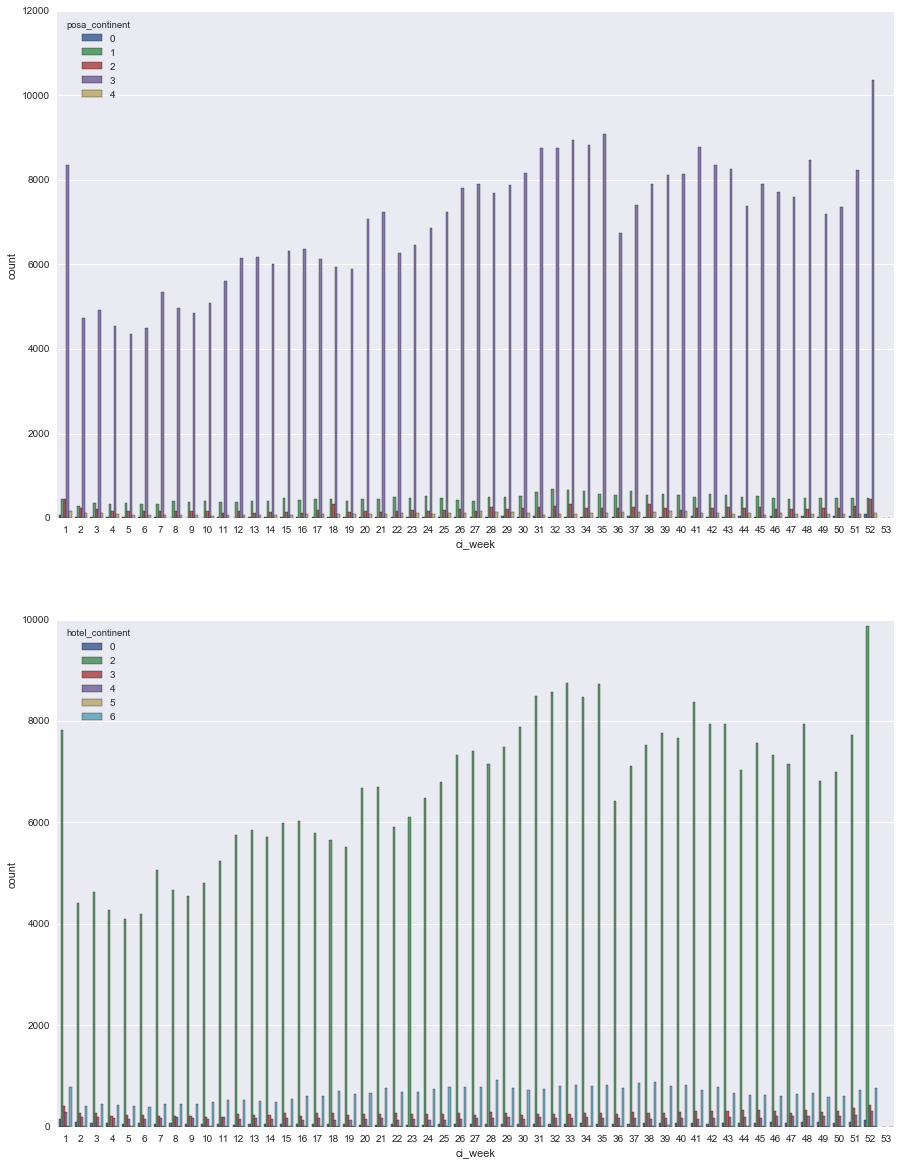

In [117]:
fig, ((axis1),(axis2)) = plt.subplots(2,1,figsize=(15,20))

#sns.countplot(x='ci_week', data=train_booked_df)

sns.countplot(x="ci_week", hue='posa_continent', data=train_top5_df, ax=axis1);
sns.countplot(x="ci_week", hue='hotel_continent', data=train_top5_df, ax=axis2);

These histograms by week provide a great visualization of the seasonal trends of each booking origin and destintation.

## Lab 1 Conclusion

### Data preprocessing and interpretation
We've successfully navigated a huge data set to arrive at a reduced subset to visualize and start understanding the underlying trends in the variables. We've successfully assessed missing data fields and imputed them with averaged values from similarly grouped variables. We've uncovered relationships between booking origin and destination, primarily in reference to the continents. It's also been clear so far that even among the small number of hotel clusters on which we've focused, it seems like obvious correlations between other data fields are not immediately evident. In our future analyses we intend to focus on continuous variables, continents of origin and destination, as well as seasonality by country of origin as potential predictors of hotel cluster.